In [200]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [201]:
df=pd.read_csv('/home/ubuntu/Desktop/Coding/ML/spam.csv')

In [202]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [204]:
df.isnull().sum()

v1    0
v2    1
dtype: int64

In [205]:
df.shape

(5572, 2)

In [206]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

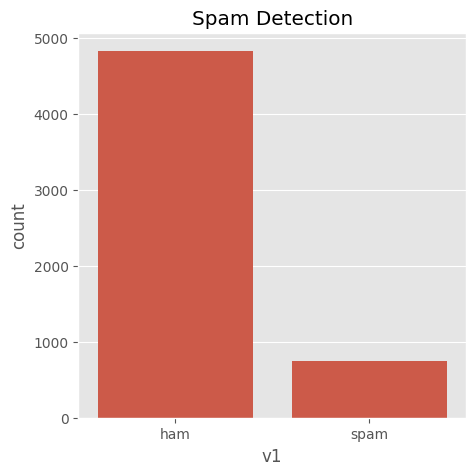

In [207]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x="v1",data=df)
plt.title("Spam Detection")
plt.show()

In [208]:
df['v1']=df['v1'].apply({'ham':0,'spam':1}.get)

In [209]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [210]:
x=df.drop('v1',axis=1)
y=df['v1']

In [211]:
data=df.where((pd.notnull(df)),'')
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [212]:
X=data['v2']
Y=data['v1']

In [213]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

In [214]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [215]:
model=LogisticRegression()

In [216]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [217]:
x_train_pred=model.predict(X_train_features)
training_accuracy=accuracy_score(x_train_pred,Y_train)

In [218]:
print("Accuraccy on the Training Model is: ",training_accuracy*100,"%")

Accuraccy on the Training Model is:  96.92859992022338 %


In [219]:
X_test_pred=model.predict(X_test_features)
testing_accuracy=accuracy_score(X_test_pred,Y_test)

In [220]:
print("Accuraccy on the Testing Model is: ",testing_accuracy*100,"%")

Accuraccy on the Testing Model is:  98.38709677419355 %


In [227]:
custom_data=["Hi Man how are u doing!"]
custom_data_features=feature_extraction.transform(custom_data)
pred=model.predict(custom_data_features)
# Congrats dear customer, you are awarded with a 1500 Bonus Prize, call 9062334543

In [228]:
if pred[0]==0:
    print("No issues, It's a Ham Message")
else:
    print("Be Alert! Its a Spam Message")

No issues, It's a Ham Message
